# Titanic with Artificial Neural Networks

Load Titanic dataset

In [1]:
import pandas as pd

titanic = pd.read_csv('./datasets/titanic.csv')
titanic.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Drop useless data

In [4]:
titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [5]:
titanic.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Fix NaN issues

In [6]:
titanic.fillna({'Age': titanic['Age'].mean()}, inplace=True)
titanic['Age'].isna().sum()

np.int64(0)

In [7]:
titanic.dropna(inplace=True)
titanic['Embarked'].isna().sum()

np.int64(0)

In [8]:
titanic.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

Split data onto training and testing datasets

In [9]:
from sklearn.model_selection import train_test_split

feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
label = 'Survived'

X = titanic[feats]
Y = titanic[label]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32, shuffle=True)

Apply scaling onto numerical data

In [10]:
from sklearn.preprocessing import StandardScaler

num_feats = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()

X_train[num_feats] = scaler.fit_transform(X_train[num_feats])
X_test[num_feats] = scaler.transform(X_test[num_feats])


In [11]:
X_train.head(n=5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
671,-1.554280,male,0.126639,0.377859,-0.484250,0.366391,S
52,-1.554280,female,1.527486,0.377859,-0.484250,0.845291,C
634,0.822264,female,-1.585508,2.083624,1.948977,-0.100325,S
197,0.822264,male,0.982712,-0.475023,0.732364,-0.477876,S
436,0.822264,female,-0.651610,1.230741,1.948977,0.025069,S


Apply encoding onto categorical data

In [12]:
from sklearn.preprocessing import LabelEncoder

sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

X_train['Sex'] = sex_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = sex_encoder.transform(X_test['Sex'])

In [13]:
X_train['Embarked'] = embarked_encoder.fit_transform(X_train['Embarked'])
X_test['Embarked'] = embarked_encoder.transform(X_test['Embarked'])

In [14]:
X_train.head(n=5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
671,-1.554280,1,0.126639,0.377859,-0.484250,0.366391,2
52,-1.554280,0,1.527486,0.377859,-0.484250,0.845291,0
634,0.822264,0,-1.585508,2.083624,1.948977,-0.100325,2
197,0.822264,1,0.982712,-0.475023,0.732364,-0.477876,2
436,0.822264,0,-0.651610,1.230741,1.948977,0.025069,2


Visualize data using correlation matrix

In [15]:
corr = X_train.corrwith(y_train).squeeze()
corr = corr.values.reshape(7, 1)

<Axes: >

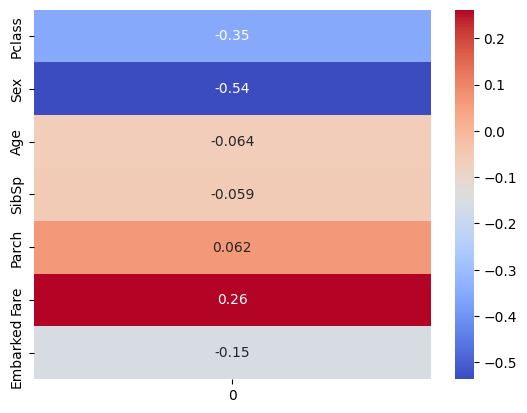

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, yticklabels=feats, annot=True, cmap='coolwarm')

Convert into tensors

In [17]:
import torch

X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [18]:
X_train.shape

torch.Size([711, 7])

In [19]:
y_train.shape

torch.Size([711])

In [20]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Create neural network

In [21]:
import torch.nn as nn

class TitanicNN(nn.Module):

    def __init__(self, in_size=7, hidden_size=32, hidden_size2=16, out_size=2):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_size, hidden_size),
            nn.ReLU(),

            nn.Linear(hidden_size, hidden_size2),
            nn.ReLU(),

            nn.Linear(hidden_size2, hidden_size2),
            nn.ReLU(),

            nn.Linear(hidden_size2, out_size)
        )
    
    def forward(self, x):
        return self.layers(x)

In [22]:
model = TitanicNN()

Training of ANN

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
n_epochs = 25

for _ in range(n_epochs):
    model.train()
    
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(x_batch)

        loss = criterion(outputs, y_batch)
        loss.backward()

        optimizer.step()

Evaluation of ANN

In [25]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        outputs = model(x_batch)
        _, pred = torch.max(outputs, 1)

        total += len(y_batch)
        correct += (y_batch == pred).sum().item()

print(f"Test Accuracy: {correct/total * 100:.2f}%")

Test Accuracy: 81.46%
